# K- Nearest Neighbors Classifier

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_blobs

## Database

In [2]:
df_pre=pd.read_parquet('accident_vehicle_preprocessed.parquet')
df_pre.head()

,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,...,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Year_y,InScotland,Hour,Day,Month,Age_of_Driver
0,3.000000,0,5.268217,8268.00000,1,6,93,8118,5,1,...,0,30,1,1,2005,0,17,5,1,45.0
1,5.000000,3,3.000000,8300.00000,1,8,93,8118,5,1,...,3,30,1,1,2005,0,0,6,1,35.0
2,10.000000,0,5.268217,85.00000,2,8,140,8118,8,1,...,3,30,1,1,2005,0,21,10,1,55.0
3,6.402357,0,5.268217,2142.73833,2,0,15,3699,0,1,...,3,30,1,1,2005,0,20,13,1,35.0
4,4.000000,3,6.000000,4266.00000,2,0,240,12714,8,1,...,3,30,1,1,2005,0,20,13,1,45.0


In [3]:
data=df_pre[df_pre['Accident_Severity']>0]
data['Accident_Severity'].value_counts()

1    59062
2     6695
Name: Accident_Severity, dtype: int64

In [5]:
inputs=data.drop('Accident_Severity', axis=1)
target=data.Accident_Severity

In [6]:
inputs.shape, target.shape

((65757, 48), (65757,))

## Creating a train-test split

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, target, 
                                                    test_size = 0.2,
                                                    random_state = 365,
                                                    stratify = target) 

## Creating the model

In [9]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 10)

clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

## Predicting

In [10]:
clf.predict(x_test)
#assigned to class 2

array([1, 1, 1, ..., 1, 1, 1])

In [11]:
neighbors = clf.kneighbors(x_test)
neighbors

#the first array stores the euclidean distance from point O to the nearest neighbor
#the second stores the index of this neighbor in a training dataset

(array([[494.05364093, 494.8270386 , 515.76594954, ..., 876.42970801,
         930.10883467, 967.41202736],
        [137.20502832, 197.13999016, 233.15498094, ..., 259.22731846,
         259.22731846, 306.03667824],
        [ 69.90708175,  80.7713554 ,  87.17852268, ..., 172.39454975,
         204.8218696 , 207.42238043],
        ...,
        [ 68.09566829, 126.0024365 , 181.09713747, ..., 321.34600475,
         331.20257263, 350.16738354],
        [ 40.17462416,  75.58211028,  89.92240309, ..., 171.0208865 ,
         173.73773826, 175.02867461],
        [388.82386758, 399.32568856, 425.88035996, ..., 527.72625887,
         544.02483241, 609.68027689]]),
 array([[26246, 45681, 50298, ..., 19132, 11979,  3045],
        [40354, 17501, 40205, ...,  2969, 47440,  1140],
        [39821, 43274, 48220, ..., 23545, 43409, 29514],
        ...,
        [11076,  2926, 19409, ..., 14664, 49908, 32694],
        [17452, 40178, 35401, ..., 33128, 29207,  4976],
        [43152, 40563, 13166, ..., 3961

## Getting the parameter of the model

In [12]:
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'uniform'}

## Getting the error rates of a set of models

In [13]:
from sklearn.metrics import accuracy_score

error_uniform = [] #error rates from models with uniformly distributed weights
error_distance = [] #error ratest from models with distance-based weights

k_range = range(1,51)

for k in k_range:
    clf = KNeighborsClassifier(n_neighbors = k, weights = 'uniform')
    clf.fit(x_train, y_train)
    predictions = clf.predict (x_test)
    error_uniform.append(1 - accuracy_score(y_test, predictions))
    
    clf = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    clf.fit(x_train, y_train)
    predictions = clf.predict (x_test)
    error_distance.append(1 - accuracy_score(y_test, predictions))

## Plotting the error rates as a function of the number of neighbors

Text(0, 0.5, 'Error rate')

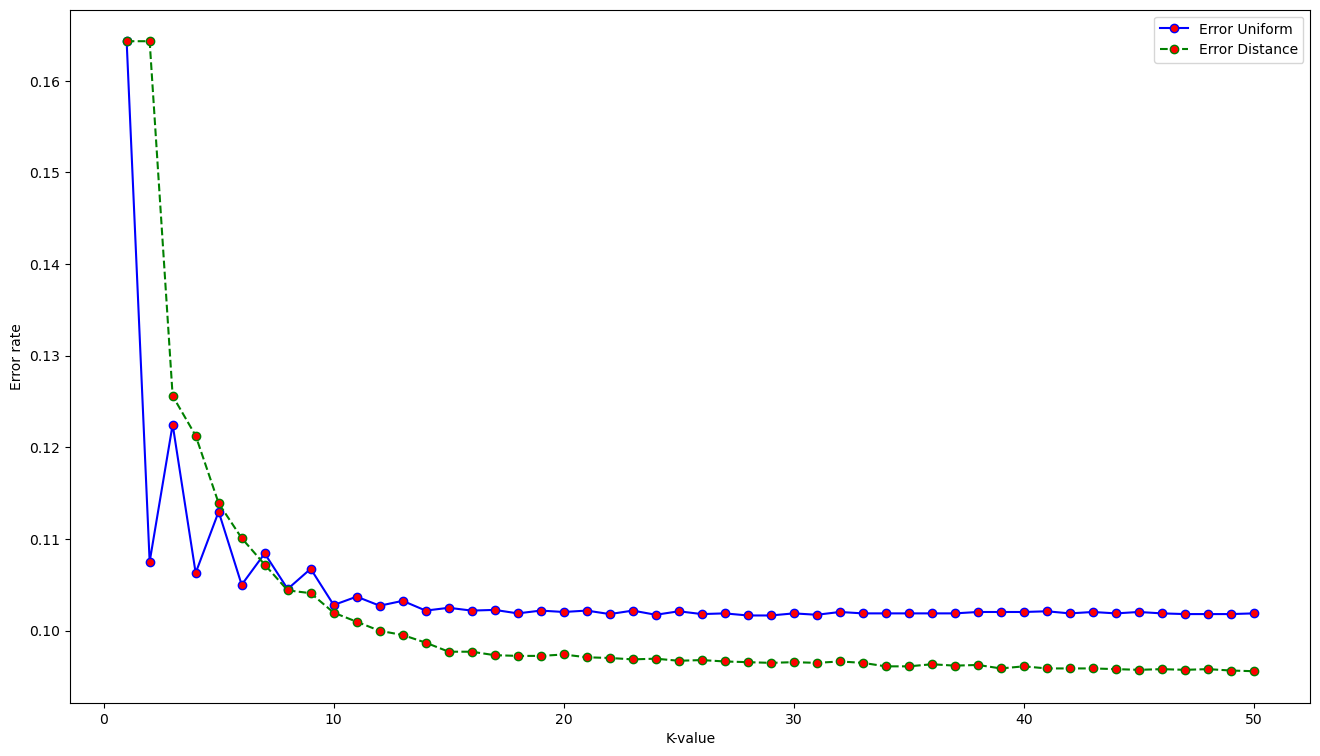

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,9))

plt.plot(k_range, error_uniform, c = 'blue', linestyle = 'solid',
         marker = 'o', markerfacecolor = 'red', label = 'Error Uniform')

plt.plot(k_range, error_distance, c = 'green', linestyle = 'dashed',
         marker = 'o', markerfacecolor = 'red', label = 'Error Distance')

plt.legend()

plt.xlabel('K-value')
plt.ylabel('Error rate')

# GridSearchCV

## Choosing a set of parameters to test

In [16]:
parameters = {'n_neighbors': range(1,51), 
              'weights':['uniform','distance']}

## Create an instance of the GridSearchCV class

In [17]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = KNeighborsClassifier(),
                            param_grid = parameters, 
                            scoring = 'accuracy',)

In [18]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [19]:
grid_search.best_params_

{'n_neighbors': 49, 'weights': 'distance'}

In [20]:
clf = grid_search.best_estimator_

In [21]:
clf

KNeighborsClassifier(n_neighbors=49, weights='distance')

In [22]:
grid_search.best_score_ #mean of all accuracies obtained during cross-validation

0.9039635015682921

## Make predictions on the test dataset

In [23]:
y_test_pred = clf.predict(x_test)
y_test_pred.shape

(13152,)

## Construct the confusion matrix

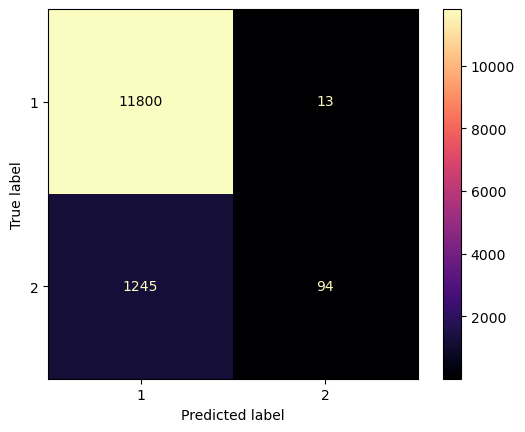

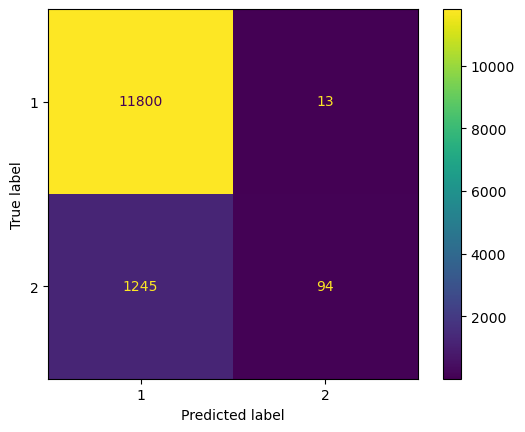

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
#confusion_matrix1= confusion_matrix(y_test, y_test_pred)
sns.reset_orig()
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels = clf.classes_,
    cmap = 'magma'
).plot()
plt.show()

## Print out the classification report

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred, target_names = ['Serious', 'Fatal']))

              precision    recall  f1-score   support

     Serious       0.90      1.00      0.95     11813
       Fatal       0.88      0.07      0.13      1339

    accuracy                           0.90     13152
   macro avg       0.89      0.53      0.54     13152
weighted avg       0.90      0.90      0.87     13152



# Handling class imbalance

## Random Undersampling

In [32]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

ns=RandomUnderSampler(random_state=43)
x_train_ns, y_train_ns=ns.fit_resample(x_train,y_train)
print("The number of classes before ns {}".format(Counter(y_train)))
print("The number of classes after ns {}".format(Counter(y_train_ns)))

The number of classes before ns Counter({1: 47249, 2: 5356})
The number of classes after ns Counter({1: 5356, 2: 5356})


In [33]:
clf

KNeighborsClassifier(n_neighbors=49, weights='distance')

In [34]:
clf.fit(x_train_ns, y_train_ns)

KNeighborsClassifier(n_neighbors=49, weights='distance')

In [35]:
y_test_pred_ns=clf.predict(x_test)

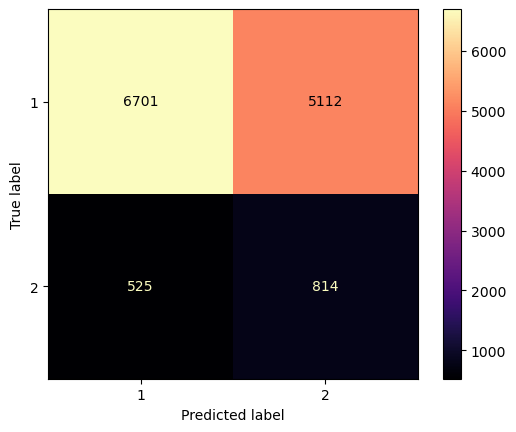

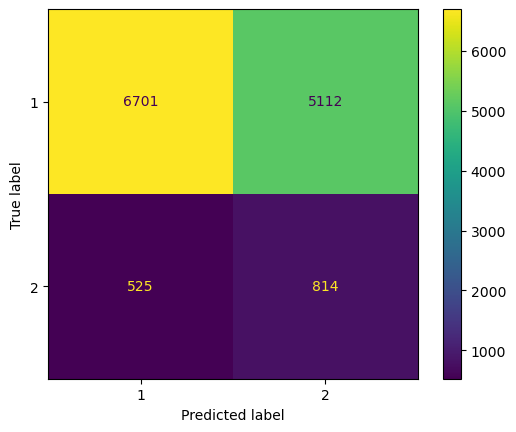

In [36]:
sns.reset_orig()
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred_ns,
    labels = clf.classes_,
    cmap = 'magma'
).plot()
plt.show()

In [37]:
print(classification_report(y_test, y_test_pred_ns, target_names = ['Serious', 'Fatal']))

              precision    recall  f1-score   support

     Serious       0.93      0.57      0.70     11813
       Fatal       0.14      0.61      0.22      1339

    accuracy                           0.57     13152
   macro avg       0.53      0.59      0.46     13152
weighted avg       0.85      0.57      0.66     13152

